In [3]:
pip install tprdbreader

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os.path
import sys
import numpy as np
import pandas as pd

import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unique

from tprdbreader import readTPRDBtable_GCP


In [ ]:
# read test data from copied study 

studies = ["LUXY_SI"]
ext = "st"
KDdf = readTPRDBtable_GCP(studies, ext, user = "TEST", verbose=1)
print(KDdf.shape)

LUXY_SI/Tables/	#sessions:57	*st:9804
(9804, 93)


In [28]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# see first n entries
KDdf.head(20)

,Id,Study,Session,SL,TL,Task,Text,Part,STseg,SToken,Lemma,SGid,SGroup,SGx,SGnbr,STime,Cur,Ins,Del,Pause,Dur,Sdur,Prob1,Prob2,PoS,UPoS,TGroup,TGid,TGnbr,Munit,Cross,Edit1,Time1,Dur1,Pause1,Pause1TrtS,Pause1TrtT,ParFixS1,ParTrtS1,ParFixT1,ParTrtT1,Edit2,Time2,Dur2,Pause2,Pause2TrtS,Pause2TrtT,ParFixS2,ParTrtS2,ParFixT2,ParTrtT2,TimeR,DurR,EditR,Runit,FFTime,FFDTime,FFDur,RPDur,Regr,FixS,FPDurS,TrtS,FixT,FPDurT,TrtT,ParFixS,ParTrtS,ParFixT,ParTrtT,InEff,Yawat,PUnbr,PUdur,PUpause,PUsid,PUtid,PUslen,PUtlen,Edit,AltT,CountT,ProbT,HTra,AltS,ProbS,HSgrp,AltC,ProbC,HCross,AltSTC,ProbSTC,HSTC
0,1,LUXY_SI,P18_T1,en,en,T,1,P18,1,Hospital,---,1,Hospital,0,1,0,0,0,0,0,0,0,0,0,---,---,hospital,7,1,0,7,---,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,---,1,57,1.0000,0.0000,1,1.0000,0.0000,11,0.0702,2.6994,11,0.0702,2.6994
1,2,LUXY_SI,P18_T1,en,en,T,1,P18,1,nurse,---,2,nurse,0,1,0,9,0,0,0,0,0,0,0,---,---,nurse,8,1,0,1,---,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,---,1,57,1.0000,0.0000,1,1.0000,0.0000,4,0.8772,0.6785,4,0.8772,0.6785
2,3,LUXY_SI,P18_T1,en,en,T,1,P18,1,Colin,---,3,Colin,0,1,0,15,0,0,0,0,0,0,0,---,---,Colin,3,1,0,-5,---,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,---,2,56,0.9825,0.1274,1,1.0000,0.0000,5,0.3158,1.6889,6,0.3158,1.7373
3,4,LUXY_SI,P18_T1,en,en,T,1,P18,1,Norris,---,4,Norris,0,1,0,21,0,0,0,0,0,0,0,---,---,Norris,4,1,0,1,---,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,---,1,57,1.0000,0.0000,1,1.0000,0.0000,1,1.0000,0.0000,1,1.0000,0.0000
4,5,LUXY_SI,P18_T1,en,en,T,1,P18,1,was,---,5,was,0,1,0,28,0,0,0,0,0,0,0,---,---,",_was",5+10,2,0,6,---,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,---,8,7,0.1228,1.4314,1,1.0000,0.0000,8,0.2807,1.8554,15,0.1053,2.6153
5,6,LUXY_SI,P18_T1,en,en,T,1,P18,1,imprisoned,---,6,imprisoned,0,1,0,32,0,0,0,0,0,0,0,---,---,sentenced_prison,11+15,2,0,10,---,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,---,14,6,0.1053,3.1130,1,1.0000,0.0000,12,0.0702,2.8339,24,0.0351,3.8322
6,7,LUXY_SI,P18_T1,en,en,T,1,P18,1,for,---,7,for,0,1,0,43,0,0,0,0,0,0,0,---,---,to_in,12+14,2,0,3,---,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,---,11,4,0.0702,2.4761,2,0.9474,0.2975,8,0.1579,2.4305,17,0.0702,3.4551
7,8,LUXY_SI,P18_T1,en,en,T,1,P18,1,life,---,8,life,0,1,0,47,0,0,0,0,0,0,0,---,---,life,13,1,0,1,---,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,---,4,52,0.9123,0.5623,1,1.0000,0.0000,6,0.7368,1.3821,11,0.7018,1.7760
8,9,LUXY_SI,P18_T1,en,en,T,1,P18,1,today,---,9,today,0,1,0,52,0,0,0,0,0,0,0,---,---,Today,1,1,0,-12,---,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,---,2,54,0.9474,0.2975,2,0.9474,0.2975,12,0.0702,2.8701,12,0.0702,2.8701
9,10,LUXY_SI,P18_T1,en,en,T,1,P18,1,for,---,10,for,0,1,0,58,0,0,0,0,0,0,0,---,---,for,16,1,0,15,---,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,---,7,41,0.7193,1.4085,3,0.9474,0.3458,12,0.0702,2.1334,17,0.0702,2.8817


In [4]:
# Additional features and adjust column names 
KDdf['ITra'] = np.log(1/KDdf['ProbT'])

# re-name of column 
KDdf['Level'] = KDdf['STseg']
KDdf['Sentence'] = KDdf['STseg']

# re-name values in column 
KDdf.replace({'Sentence':{1:"S1", 2:"S1",3:"S1",4:"S1",5:"S2",6:"S2",7:"S2",8:"S2",}}, inplace = True)
KDdf.replace({'Level':{1:"L1", 2:"L2",3:"L3",4:"L4",5:"L1",6:"L2",7:"L3",8:"L4",}}, inplace = True)



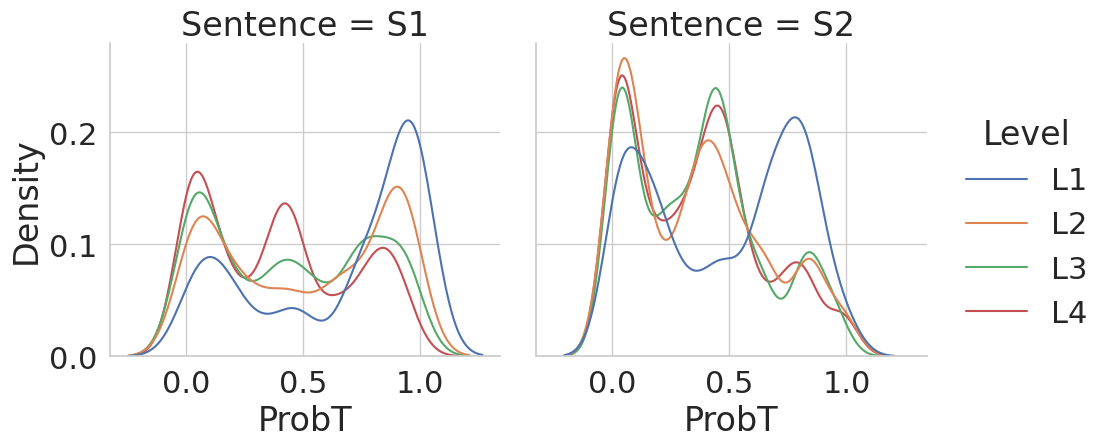

In [5]:
sns.set(font_scale=2)
sns.set_style("whitegrid")

g = sns.displot(KDdf, x='ProbT', kind="kde", hue='Level', col="Sentence", aspect = 1)


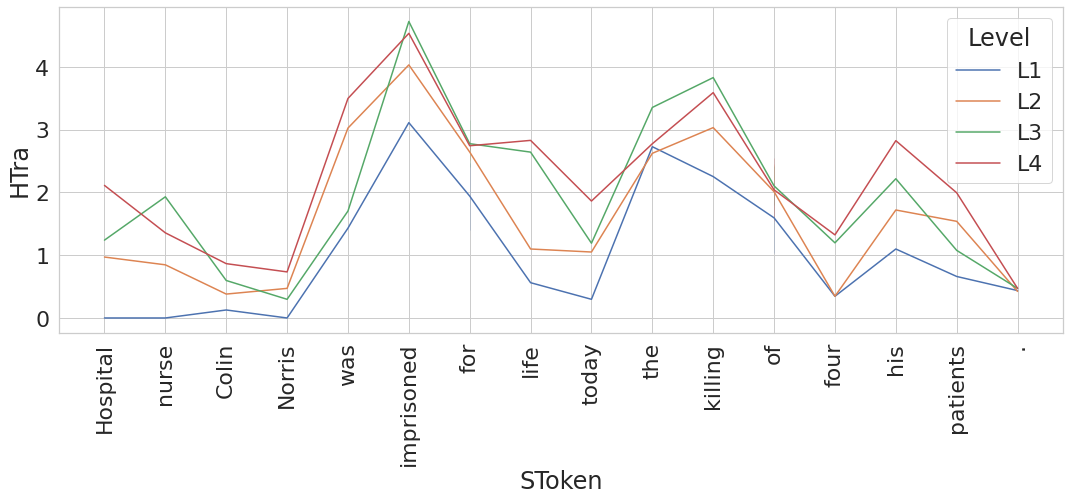

In [52]:
KD1 = KDdf[(KDdf.Part == "P01") & (KDdf.Sentence == "S1")] 

sns.set(font_scale=2)
sns.set_style("whitegrid")

plt.figure(figsize=(18, 6))  # width=12 inches, height=6 inches
plt.xticks(rotation=90)

g= sns.lineplot(data=KD1, x="SToken", y="HTra", hue="Level")

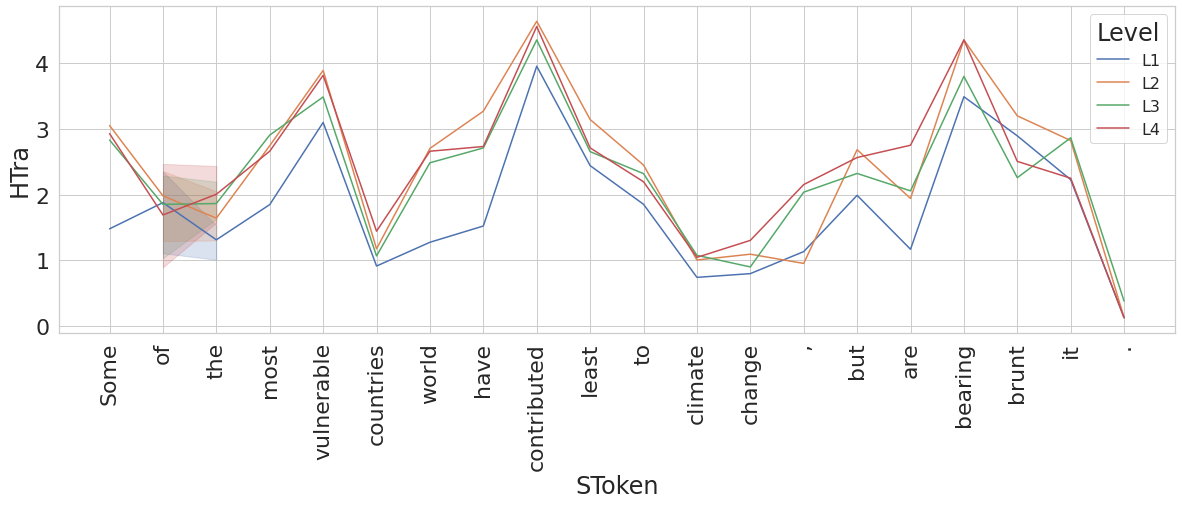

In [62]:
KD1 = KDdf[(KDdf.Part == "P01") & (KDdf.Sentence == "S2")] 

sns.set(font_scale=2)
sns.set_style("whitegrid")

plt.figure(figsize=(20, 6))  # width=12 inches, height=6 inches
plt.xticks(rotation=90)

g= sns.lineplot(data=KD1, x="SToken", y="HTra", hue="Level")
sns.move_legend(g, "upper right", fontsize=16, bbox_to_anchor=(1, 1))
